# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos es sobre informacion bancaria de personas. El banco busca automatizar las desiciones al otorgar un credito y así cumplir con la "Equal Credit Opportunity Act"
2. El objetivo del data set es la de predecir si las personas del mismo son aptas o no para recibir un credito hipotecario.
3. Los atributos disponibles para la prediccion son:
TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
 LOAN    Amount of the loan request
 MORTDUE Amount due on existing mortgage
 VALUE   Value of current property
 YOJ     Years at present job
 DEROG   Number of major derogatory reports
 DELINQ  Number of delinquent credit lines
 CLAGE   Age of oldest trade line in months
 NINQ    Number of recent credit lines
 CLNO    Number of credit lines
 DEBTINC Debt-to-income ratio


4. Entre los atributos que podemos establecer como importantes a la hora de evaluar podemos encontrar:
DELINQ  Number of delinquent credit lines (creditos inpagos)
VALUE   Value of current property
LOAN    Amount of the loan request
MORTDUE Amount due on existing mortgage

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='DEBTINC', ylabel='Density'>

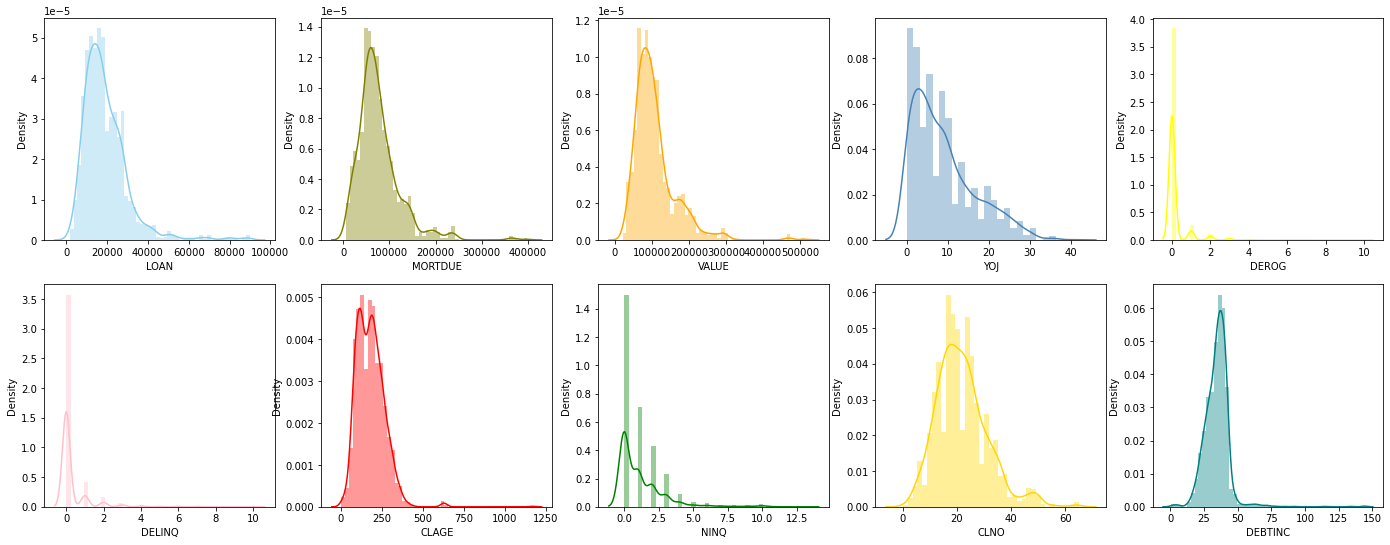

In [18]:
f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.distplot( dataset['LOAN'] , color="skyblue", ax=axes[0, 0])
sns.distplot( dataset['MORTDUE'] , color="olive", ax=axes[0, 1])
sns.distplot( dataset['VALUE'] , color="orange", ax=axes[0, 2])
sns.distplot( dataset['YOJ'] , color="steelblue", ax=axes[0, 3])
sns.distplot( dataset['DEROG'] , color="yellow", ax=axes[0, 4])
sns.distplot( dataset['DELINQ'] , color="pink", ax=axes[1, 0])
sns.distplot( dataset['CLAGE'] , color="red", ax=axes[1, 1])
sns.distplot( dataset['NINQ'] , color="green", ax=axes[1, 2])
sns.distplot( dataset['CLNO'] , color="gold", ax=axes[1, 3])
sns.distplot( dataset['DEBTINC'] , color="teal", ax=axes[1, 4])

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [19]:
>>> from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier(random_state=42)
model1.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [21]:
>>> import numpy as np
>>> from sklearn.linear_model import SGDClassifier
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import Pipeline
>>> from sklearn.pipeline import make_pipeline


In [22]:
model1=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=42))])

model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=42))])

In [23]:
score = model1.score(X_train, y_train)
print("Training score: ", score) 

Training score:  0.8260283209710048


In [24]:
ypredtrain = model1.predict(X_train)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
acs=accuracy_score(y_train,ypredtrain) 
rs=recall_score(y_train,ypredtrain, average=None) 
ps=precision_score(y_train,ypredtrain, average=None)
f1 = f1_score(y_train, ypredtrain, average=None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8260283209710048
precision score :  [0.86561562 0.47682119]
recall score :  [0.93587662 0.28685259]
f1 score :  [0.89937598 0.35820896]


In [26]:
>>> clf.coef_

array([[ -7887.81770377, -65832.11607751, -80128.54221443,
         -1319.50530724,    659.26575129,   1101.37306456,
        -36211.59158525,    838.44580777,   1913.52614665,
         10584.69616786]])

In [27]:
>>> clf.intercept_

array([106.86475184])

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_train, ypredtrain))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1232
           1       0.48      0.29      0.36       251

    accuracy                           0.83      1483
   macro avg       0.67      0.61      0.63      1483
weighted avg       0.80      0.83      0.81      1483



### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [30]:
from sklearn.model_selection import GridSearchCV

model = SGDClassifier(random_state=99)

In [31]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 99,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [32]:
model.max_iter = 3000
model.loss_functions

{'hinge': (sklearn.linear_model._sgd_fast.Hinge, 1.0),
 'squared_hinge': (sklearn.linear_model._sgd_fast.SquaredHinge, 1.0),
 'perceptron': (sklearn.linear_model._sgd_fast.Hinge, 0.0),
 'log': (sklearn.linear_model._sgd_fast.Log,),
 'modified_huber': (sklearn.linear_model._sgd_fast.ModifiedHuber,),
 'squared_error': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'squared_loss': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'huber': (sklearn.linear_model._sgd_fast.Huber, 0.1),
 'epsilon_insensitive': (sklearn.linear_model._sgd_fast.EpsilonInsensitive,
  0.1),
 'squared_epsilon_insensitive': (sklearn.linear_model._sgd_fast.SquaredEpsilonInsensitive,
  0.1)}

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html